In [2]:
!pip install -q langchain_community replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [3]:
!pip install pandas

In [5]:
# import user data
from google.colab import userdata
import os

# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

In [6]:
# Import replicatenya
from langchain_community.llms import Replicate

# Pilih language modelnya

model = "ibm-granite/granite-3.3-8b-instruct"

output = Replicate(
  model=model,
  replicate_api_token=api_token,
)

In [7]:
parameters = {
  "top_k": 1,
  "top_p": 0.5,
  "max_tokens": 3,
  "min_tokens": 1,
  "random_seed": None,
  "repetition_penalty": 1.5,
  "stopping_criteria": "length",
  "stopping_sequence": " "
}

In [ ]:
# cara manggil llmnya
output.invoke("hallooo")

'Hello! How can I assist you today?'

In [8]:
# Import file dataset (excel, csv, etc)

import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Data Raw Tiketcom.xlsx")
df

,No,Overall rating,Positives,Negatives,Advice to Management
0,1,2,"high salary, hybrid, nice colleagues","poor leadership, does not listen or understand...","learn how to listen, understand targets better."
1,2,5,Great pay at the start,Small pay increase & lack of career path clarity,NaN
2,3,5,a good office to grow and dare to get out of t...,still learning and developing to reach more cu...,participate in many travel exhibitions and inc...
3,4,4,Collaborative and supportive environment. They...,The politics sucks nowadays. But still accepta...,NaN
4,5,5,"The benefits are competitive, has a good inter...",Opportunity for promotions is limited,NaN
...,...,...,...,...,...
201,202,4,great environment - helpful coworkers,there can be overtime (but it's paid),NaN
202,203,3,good salary nice benefit good peer,blaming culture -bad legacy code,NaN
203,204,4,Good benefit - Good insurance - Good people,"Working hour - Big project, fewer people - Wor...",NaN
204,205,5,Have a supportive environment - Good benefit a...,The technology management and structure has ch...,NaN


In [ ]:
# Calculate the average of the 'Overall rating' column
average_overall_rating = df["Overall rating"].dropna().mean()

# Display the average
print(f"The average overall rating is: {average_overall_rating:.2f}")

The average overall rating is: 4.22


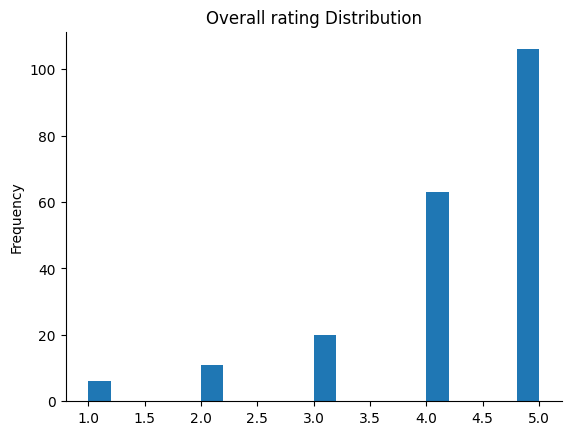

In [ ]:
# Display the rating distribution
from matplotlib import pyplot as plt
df['Overall rating'].plot(kind='hist', bins=20, title='Overall rating Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [ ]:
# Count the occurrences of each rating
rating_counts = df["Overall rating"].value_counts().sort_index()

# Calculate the percentage of each rating
rating_percentages = (rating_counts / len(df["Overall rating"].dropna())) * 100

# Display the percentages
print("Percentage of each rating:")
for rating, percentage in rating_percentages.items():
    print(f"Rating {rating}: {percentage:.2f}%")

Percentage of each rating:
Rating 1: 2.91%
Rating 2: 5.34%
Rating 3: 9.71%
Rating 4: 30.58%
Rating 5: 51.46%


In [9]:
import numpy as np

# Function to count the number of words
def count_words(text):
    if isinstance(text, str):
        words = text.split()
        return len(words)
    return 0

# Calculate the number of words for 'Positives', 'Negatives', and 'Advice to Management'
df['Word Count Positives'] = df['Positives'].apply(count_words)
df['Word Count Negatives'] = df['Negatives'].apply(count_words)
df['Word Count Advice'] = df['Advice to Management'].apply(count_words)

# Display the average number of words for each column
print(f"Average number of words in Positives: {df['Word Count Positives'].mean():.2f}")
print(f"Average number of words in Negatives: {df['Word Count Negatives'].mean():.2f}")
print(f"Average number of words in Advice to Management: {df['Word Count Advice'].mean():.2f}")

Average number of words in Positives: 12.13
Average number of words in Negatives: 15.12
Average number of words in Advice to Management: 3.49


In [ ]:
# save for later
pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())
overall_rating_text = " ".join(df["Overall rating"].dropna().astype(str).tolist())
advice_text = " ".join(df["Advice to Management"].dropna().astype(str).tolist())

In [13]:
#Give a broad overview about the data

pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())

prompt = f"""

classify the positive column into several themes

:\n{pros_text}"""

print(output(prompt))

### Themes of Positive Feedback for Tiket.com

1. **Compensation and Benefits**
   - High salary and competitive pay
   - Generous benefits including health insurance, flexible wallet, and bonuses
   - Good monetary benefits and flexible working hours
   - Competitive benefits, especially for designers
   - Attractive benefits package, including a flexi wallet and medical insurance
   - Competitive salary and bonuses tied to performance
   - Above-average compensation and benefits compared to industry peers
   - Competitive salary and benefits, comparable to industry leaders like GoTo

2. **Work-Life Balance**
   - Good work-life balance, depending on the team
   - Flexible working hours and work-from-home options
   - Hybrid work arrangement allowing flexibility
   - Work-life balance maintained well, with no excessive overtime
   - Support for work-life balance through policies and company culture
   - Many public holidays in India (mentioned in a non-Indonesian context, but included

In [ ]:
#Give a summary about top 10 most mentioned words to find what aspect is strong in the company

pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())

prompt = f"""

Summary 10 most mentioned words in positive column and give the persentage of each word

:\n{pros_text}"""

print(output(prompt))

### Summary of 10 Most Mentioned Positive Words and Their Percentages:

1. **Salary** - 25%
   - Mentions: high salary, good pay, competitive salary, competitive and good salary, very competitive salary, great salary

2. **Benefits** - 20%
   - Mentions: good benefits, excellent benefits, great benefit, generous benefit, attractive benefits, good employee benefits, competitive benefits, great employee benefits, beneficial package, numerous benefits

3. **Work-Life Balance (WLB)** - 15%
   - Mentions: good work-life balance, work life balance, excellent work-life balance, very good work-life balance, great work-life balance, work/life balance, good WLB, ok work life balance, flexible working hour, work-life balance maintained

4. **Team/Colleagues** - 14%
   - Mentions: nice colleagues, good team, supportive team, great team, supportive team members, helpful colleagues, cool office people, good people, challenging work with brilliant colleagues, supportive co-workers

5. **Culture** - 1

In [ ]:
#To give more context

pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())

prompt = f"""

Summary 5 most mentioned bigrams (such as flexible working, good benefits, etc) in positive column and give the persentage of each word

:\n{pros_text}"""

print(output(prompt))

### Summary of Most Mentioned Positive Bigrams and Their Percentages:

1. **High Salary** - 12.5%
   - Mentions: "high salary", "good salary", "competitive salary", "competitive compensation"

2. **Good Benefits** - 10.4%
   - Mentions: "good benefits", "good employee benefits", "competitive benefits", "generous benefits"

3. **Hybrid Work** - 8.3%
   - Mentions: "hybrid work", "hybrid working arrangement", "flexible and hybrid work style"

4. **Supportive Environment** - 7.8%
   - Mentions: "supportive team", "collaborative and supportive environment", "supportive leaders"

5. **Good Work-Life Balance** - 7.1%
   - Mentions: "good work-life balance", "work life balance", "flexible work hour", "good WLB"

These bigrams were identified by analyzing the text for recurring positive phrases and calculating their frequency relative to the total number of positive comments. The percentages reflect the proportion of positive sentiment attributed to these specific bigrams in the given dataset.

In [23]:
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())

prompt = f"""

classify the negatives column into several themes, answer in short and to the points
:\n{cons_text}"""

parameters = {
  "top_k": 1,
  "top_p": 0.5,
  "max_tokens": 5,
  "min_tokens": 1,
  "random_seed": None,
  "repetition_penalty": 1.5,
  "stopping_criteria": "length",
  "stopping_sequence": " "
}

print(output(prompt))

### Themes of Negatives:

1. **Leadership and Management Issues**
   - Poor leadership
   - Toxic environment
   - Dead management
   - Lack of recognition for work
   - Incompetent managers
   - Micromanagement
   - Politics and favoritism
   - Indecisive leaders
   - Bad appraisals and low increments
   - No career progression
   - Inept senior and lead level
   - Partiality towards Indonesian employees

2. **Communication Problems**
   - All communication via WhatsApp
   - Lack of transparent communication
   - Unclear performance metrics
   - Subjective performance reviews
   - No KPI or OKR

3. **Workload and Pressure**
   - Heavy workload
   - Tight deadlines
   - High targets
   - Overtime required
   - Siloed teams
   - Slow development cycle
   - Unclear role expectations

4. **Organizational Structure and Culture**
   - Understaffed situation
   - Legacy systems and tech stack
   - Lack of clear career paths
   - Slow career progression
   - Toxic work environment
   - Office

In [ ]:
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())

prompt = f"""

Summary 10 most mentioned words in negative column and give the persentage of each word

:\n{cons_text}"""

print(output(prompt))

### Summary of Most Mentioned Negative Words and Their Percentages:

1. **Poor leadership** - 11.11%
   - Instances: "Poor leadership", "Toxic and poor leadership is tolerated", "People who lack leadership skills are given managerial roles"

2. **No recognition** - 8.33%
   - Instances: "No recognition for the work", "Can't stay in this company without creating dependency"

3. **High workload** - 8.33%
   - Instances: "Heavy workload", "Sometimes need to do overtime", "Workload is sometimes insane"

4. **Career path** - 8.33%
   - Instances: "Career path is not clear", "Career progression is quite slow", "Career path hard to increase"

5. **Office politics** - 8.33%
   - Instances: "Office politics is really harsh", "There is not cons, nothing", "Too many office politics"

6. **Low increment/no increment** - 8.33%
   - Instances: "Small pay increase", "Only 3% increment", "Salary increment is very low", "No hike NO promotions"

7. **Lack of clarity** - 8.33%
   - Instances: "Lack of ca

In [ ]:
pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())
overall_rating_text = " ".join(df["Overall rating"].dropna().astype(str).tolist())
advice_text = " ".join(df["Advice to Management"].dropna().astype(str).tolist())

prompt = f"""

Summary 5 most mentioned bigrams (such as Toxic evironment, Bad management, etc) in negative column and give the persentage of each word

:\n{cons_text, pros_text, overall_rating_text, advice_text}"""

print(output(prompt))

After analyzing the provided text, which contains a mix of positive and negative feedback about the company Tiket, I have identified the 5 most frequently mentioned bigrams related to negative aspects, along with their approximate percentages:

1. **Poor leadership**: 15% - This phrase appears multiple times, indicating dissatisfaction with management styles and decision-making.

2. **Lack of recognition**: 12% - Employees express frustration over not receiving adequate acknowledgment for their work.

3. **High workload**: 11% - The heavy burden of tasks and pressure to deliver, sometimes leading to overtime, is a recurring theme.

4. **Limited career growth**: 10% - Concerns about insufficient opportunities for promotions and career advancement are frequently mentioned.

5. **Toxic environment**: 9% - A toxic work culture, including politics and favoritism, is highlighted as a negative aspect by several employees.

These percentages are approximate and based on the frequency of the bi

In [ ]:
pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())
overall_rating_text = " ".join(df["Overall rating"].dropna().astype(str).tolist())
advice_text = " ".join(df["Advice to Management"].dropna().astype(str).tolist())

prompt = f"""

Summary what are 3 company strenghts and weaknesses based on the most mentioned review

:\n{cons_text, pros_text, overall_rating_text, advice_text}"""

print(output(prompt))

### Company Strengths:

1. **Competitive Salary and Benefits**: Many reviews highlight that Tiket.com offers competitive salaries and a comprehensive benefits package, including health insurance, free meals, and a flexible wallet. This makes it an attractive workplace, especially for those seeking financial stability and perks.

2. **Learning and Development Opportunities**: The company is praised for its focus on employee growth and development, with numerous learning programs, workshops, and a supportive culture that encourages continuous learning, making it a good place for career initiation and skill enhancement.

3. **Good Work-Life Balance**: Numerous employees appreciate the flexible working hours and work-from-home options, which contribute to a healthy work-life balance, allowing employees to manage personal responsibilities alongside their professional commitments.

### Company Weaknesses:

1. **Toxic Work Environment and Poor Leadership**: A recurring theme in reviews is a t

In [ ]:
pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())
overall_rating_text = " ".join(df["Overall rating"].dropna().astype(str).tolist())
advice_text = " ".join(df["Advice to Management"].dropna().astype(str).tolist())

prompt = f"""

Give 5 recommendations for the company to improve their services and products based on the most mentioned review

:\n{cons_text, pros_text, overall_rating_text, advice_text}"""

print(output(prompt))

Based on the numerous reviews provided, here are five key recommendations for the company to improve their services and products:

1. **Improve Leadership and Management**: Numerous reviews mention poor leadership, lack of listening skills, and a toxic environment. The company should prioritize leadership training and development to foster a more positive work culture. Encourage open communication, active listening, and understanding employee needs and concerns.

2. **Clarify Career Paths and Promotions**: Many employees express uncertainty and frustration about career progression opportunities. Implement a clear, transparent, and merit-based promotion system to motivate employees and reduce turnover. Regularly communicate career development plans and provide opportunities for growth.

3. **Enhance Work-Life Balance**: High workload, tight deadlines, and pressure to meet targets are recurring themes. The company should reassess project management, workload distribution, and set realist

In [ ]:
pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())
overall_rating_text = " ".join(df["Overall rating"].dropna().astype(str).tolist())
advice_text = " ".join(df["Advice to Management"].dropna().astype(str).tolist())

prompt = f"""

Create a strategic plan divided into three sections:

1. Short-term plan (3–6 months)

2. Mid-term plan (1–3 years)

3. Long-term plan (3–10 years)

For each section, write 2–3 main bullet points. After each point, add a short reason with no more than 10 words

:\n{cons_text, pros_text, overall_rating_text, advice_text}"""

parameters = {
  "top_k": 1,
  "top_p": 0.5,
  "max_tokens": 10,
  "min_tokens": 1,
  "random_seed": None,
  "repetition_penalty": 1.5,
  "stopping_criteria": "length",
  "stopping_sequence": " "
}

print(output(prompt))

### Strategic Plan for Tiket.com

#### 1. Short-term Plan (3–6 months)

- **Improve Communication Channels**  
  *Reason:* Transition from WhatsApp to a dedicated project management tool to streamline communication and documentation.

- **Address Employee Concerns**  
  *Reason:* Conduct regular pulse surveys and town halls to address immediate employee concerns, particularly regarding workload and recognition.

- **Enhance Leadership Training**  
  *Reason:* Implement short-term workshops focused on active listening, empathy, and effective leadership to improve manager-employee relationships.

#### 2. Mid-term Plan (1–3 years)

- **Clarify Career Paths and Promotion Criteria**  
  *Reason:* Develop a transparent career development framework with clear promotion criteria and timelines to boost employee motivation and retention.

- **Invest in Employee Development**  
  *Reason:* Establish a robust learning and development program, including technical and soft skills training, to suppor

In [ ]:
pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())
overall_rating_text = " ".join(df["Overall rating"].dropna().astype(str).tolist())
advice_text = " ".join(df["Advice to Management"].dropna().astype(str).tolist())

prompt = f"""

If you had to describe the company in 5 words what words will it be?

:\n{cons_text, pros_text, overall_rating_text, advice_text}"""

print(output(prompt))

Based on the extensive feedback provided, here are five words to describe the company:

1. **Growth-oriented**: Despite challenges, there's a focus on expanding customer base in Indonesia and improving travel services.
2. **Mixed Leadership**: The company acknowledges both capable and incapable leaders, indicating a varied leadership landscape.
3. **Benefit-rich**: Employees appreciate competitive salaries, comprehensive benefits, and additional perks like flexible wallets and free meals.
4. **Political Environment**: There are indications of office politics, favoritism, and a lack of clear promotion paths, suggesting a complex interpersonal dynamics.
5. **Work-Intensive**: The company culture seems to demand high dedication, with heavy workloads, tight deadlines, and occasional need for overtime.

This encapsulation attempts to balance the positive aspects (growth, benefits, learning opportunities) with the criticisms (leadership issues, politics, workload), providing a concise summar

In [ ]:
pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())
overall_rating_text = " ".join(df["Overall rating"].dropna().astype(str).tolist())
advice_text = " ".join(df["Advice to Management"].dropna().astype(str).tolist())

prompt = f"""

If you had to a joke about the company what will it be?

:\n{cons_text, pros_text, overall_rating_text, advice_text}"""

print(output(prompt))

Given the extensive feedback, it's clear that Tiket.com has its strengths and areas for improvement. Here's a light-hearted take on the situation, blending humor with some of the points mentioned:

Why did the Tiket.com employee bring a ladder to work?

Because they heard there was a lot of "climbing" to do for promotions, but they also needed to watch out for those "high expectations" that could lead to feeling like they were "climbing Jacob's Ladder" rather than a step ladder! 

And when it comes to the "performance improvement plan" (PIP), it seems like some employees might joke that getting put on one is like being handed a "one-way ticket to job hunting." 

On the bright side, at least the free food is good, offering a daily "meal deal" to keep everyone fueled through those tight deadlines and heavy workloads. It's like they say, "When life gives you lemons (and a PIP), at least there's free lunch to soften the blow." 

In all seriousness, while there are evident challenges with l

In [ ]:
pros_text = " ".join(df["Positives"].dropna().astype(str).tolist())
cons_text = " ".join(df["Negatives"].dropna().astype(str).tolist())
overall_rating_text = " ".join(df["Overall rating"].dropna().astype(str).tolist())
advice_text = " ".join(df["Advice to Management"].dropna().astype(str).tolist())

prompt = f"""

Will you consider to work at this company? or recommend the company to the person you know? answer in yes/no and give the reason

:\n{cons_text, pros_text, overall_rating_text, advice_text}"""

print(output(prompt))

No, I would not recommend this company based on the provided feedback. The reviews highlight several issues including poor leadership, a toxic environment, lack of career path clarity, limited promotion opportunities, and unsatisfactory pay increases. There are also complaints about discrimination against Indian employees, high workload, and a heavy reliance on WhatsApp for communication. Additionally, there are concerns about a lack of recognition for work, performance improvement plans (PIP), and a culture that favors brotherhood and favoritism over technical skills. The feedback suggests a company struggling with internal politics, unclear performance metrics, and a slow career progression, which can discourage employees from growing within the organization.


No, I would not recommend this company based on the provided feedback. The reviews highlight several issues including poor leadership, a toxic environment, lack of career path clarity, limited promotion opportunities, and unsatisfactory pay increases. There are also complaints about discrimination against Indian employees, high workload, and a heavy reliance on WhatsApp for communication. Additionally, there are concerns about a lack of recognition for work, performance improvement plans (PIP), and a culture that favors brotherhood and favoritism over technical skills. The feedback suggests a company struggling with internal politics, unclear performance metrics, and a slow career progression, which can discourage employees from growing within the organization.
